In [3]:
!pip install haversine
from random import random,sample
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from haversine import haversine
import matplotlib.cm as cm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
def read_tsp_file(filename):
    with open(filename, 'r') as file:
        data = file.readline().strip().split()
        print("\n\nFile Name:", data[2])

        while data[0] != 'NODE_COORD_SECTION':
            if data[0] == 'DIMENSION':
                num_cities = data[2]
            data = file.readline().strip().split()

        city_coords = []
        city_names = []
        print('Total cities:', num_cities)
        num_cities = int(num_cities)

        for _ in range(num_cities):
            city, coord_x, coord_y = file.readline().strip().split()[:]
            city_coords.append([float(coord_x), float(coord_y)])
            city_names.append(city)

    return city_coords, city_names


In [6]:
def calculate_distance(coords, city1, city2):
    dist = math.sqrt((coords[city1][0] - coords[city2][0]) ** 2 + (coords[city1][1] - coords[city2][1]) ** 2)
    return dist

In [7]:
def compute_global_distance(coords, city1, city2):
    dist = haversine((coords[city1][0], coords[city1][1]), (coords[city2][0], coords[city2][1]), unit='km')
    return dist


In [8]:
def apply_cooling(temp):
    return temp * 0.9999


In [9]:
def calculate_path_cost(distance_matrix, route):
    total_cost = 0
    route_length = len(route)
    for i in range(route_length):
        total_cost += distance_matrix[route[i], route[(i + 1) % route_length]]
    return total_cost


In [10]:
def perform_simulated_annealing(coords, distance_matrix, num_cities):
    current_path = np.random.permutation(num_cities)
    current_cost = calculate_path_cost(distance_matrix, current_path)
    initial_path = current_path
    initial_cost = current_cost

    max_iterations = 1000000
    temp = num_cities * 1000

    for iteration in range(max_iterations):
        indices = sample(range(len(coords)), 2)
        new_path = current_path.copy()
        new_path[indices[0]:indices[1] + 1] = new_path[indices[0]:indices[1] + 1][::-1]
        new_cost = calculate_path_cost(distance_matrix, new_path)

        cost_difference = current_cost - new_cost
        try:
            acceptance_probability = 1 / (1 + math.exp(-cost_difference / temp))
        except OverflowError:
            acceptance_probability = 0

        if cost_difference > 0:
            current_path = new_path.copy()
            current_cost = new_cost
        elif random() < acceptance_probability:
            current_path = new_path.copy()
            current_cost = new_cost

        temp = apply_cooling(temp)
        if temp < 1e-8:
            return current_path, current_cost, initial_path, initial_cost, iteration

    return current_path, current_cost, initial_path, initial_cost, -1

In [11]:
def plot_graph(coords, route):
    x_coords = []
    y_coords = []
    route_length = len(route)

    colormap = cm.get_cmap('viridis')
    node_color = colormap(0.2)
    route_color = colormap(0.8)

    for i in range(route_length):
        x_coords.append(coords[route[i]][0])
        y_coords.append(coords[route[i]][1])
        plt.plot(coords[route[i]][0], coords[route[i]][1], 'o', color=node_color, markersize=5)

    # Plot the route
    x_coords.append(coords[route[0]][0])
    y_coords.append(coords[route[0]][1])
    plt.plot(x_coords, y_coords, color=route_color, linewidth=2)

In [12]:
def display_route(route, locations):
    for i in range(len(route)):
        print(locations[route[i]], "-->", end=" ")
    print(locations[route[0]])




File Name: xqg237
Total cities: 237

Initial Path Cost: 12681.83089884105
Initial Path:
168 --> 66 --> 154 --> 24 --> 112 --> 19 --> 127 --> 162 --> 46 --> 131 --> 83 --> 195 --> 92 --> 15 --> 21 --> 33 --> 155 --> 98 --> 69 --> 192 --> 209 --> 159 --> 114 --> 36 --> 176 --> 163 --> 230 --> 22 --> 196 --> 187 --> 116 --> 17 --> 51 --> 210 --> 12 --> 212 --> 144 --> 216 --> 222 --> 160 --> 136 --> 128 --> 223 --> 206 --> 138 --> 194 --> 10 --> 117 --> 84 --> 56 --> 119 --> 101 --> 75 --> 108 --> 37 --> 42 --> 40 --> 77 --> 224 --> 82 --> 183 --> 72 --> 185 --> 58 --> 237 --> 48 --> 88 --> 204 --> 202 --> 90 --> 145 --> 161 --> 126 --> 73 --> 45 --> 4 --> 165 --> 232 --> 157 --> 175 --> 61 --> 231 --> 106 --> 207 --> 67 --> 26 --> 236 --> 30 --> 39 --> 100 --> 218 --> 214 --> 190 --> 166 --> 31 --> 203 --> 121 --> 213 --> 38 --> 55 --> 215 --> 142 --> 153 --> 54 --> 124 --> 135 --> 130 --> 11 --> 104 --> 47 --> 99 --> 208 --> 78 --> 95 --> 146 --> 13 --> 107 --> 141 --> 139 --> 120 -->

<ipython-input-11-41aa84a23d1e>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis')


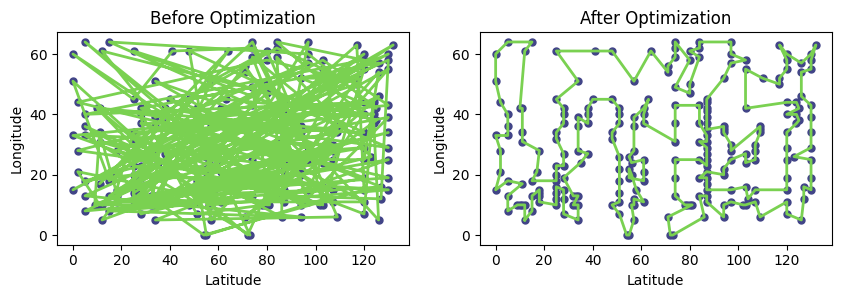



File Name: pma343
Total cities: 343

Initial Path Cost: 36324.62872988623
Initial Path:
323 --> 36 --> 25 --> 315 --> 168 --> 329 --> 279 --> 201 --> 179 --> 100 --> 101 --> 307 --> 77 --> 78 --> 176 --> 261 --> 312 --> 132 --> 158 --> 136 --> 86 --> 121 --> 32 --> 124 --> 82 --> 178 --> 107 --> 130 --> 97 --> 46 --> 258 --> 31 --> 232 --> 211 --> 23 --> 226 --> 162 --> 37 --> 291 --> 228 --> 224 --> 47 --> 163 --> 213 --> 189 --> 73 --> 214 --> 302 --> 43 --> 319 --> 112 --> 335 --> 295 --> 61 --> 6 --> 260 --> 193 --> 322 --> 183 --> 75 --> 17 --> 218 --> 69 --> 4 --> 28 --> 263 --> 64 --> 310 --> 298 --> 56 --> 57 --> 274 --> 92 --> 39 --> 327 --> 55 --> 174 --> 42 --> 165 --> 54 --> 108 --> 52 --> 18 --> 127 --> 297 --> 205 --> 128 --> 148 --> 159 --> 304 --> 79 --> 237 --> 324 --> 215 --> 217 --> 318 --> 15 --> 221 --> 240 --> 299 --> 343 --> 332 --> 110 --> 170 --> 196 --> 313 --> 115 --> 316 --> 194 --> 26 --> 320 --> 339 --> 66 --> 190 --> 141 --> 282 --> 303 --> 292 --> 252 

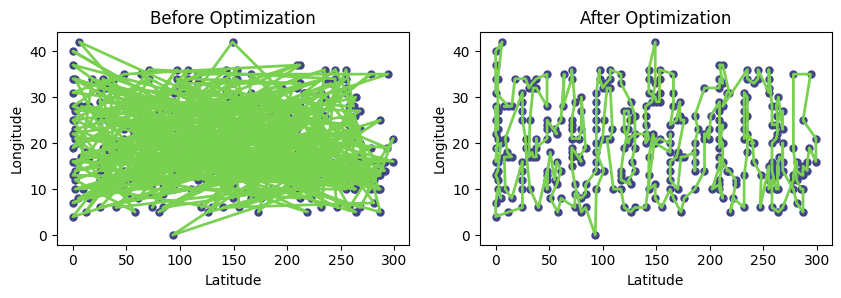



File Name: pka379
Total cities: 379

Initial Path Cost: 36944.52595503448
Initial Path:
338 --> 82 --> 39 --> 320 --> 116 --> 154 --> 41 --> 193 --> 216 --> 197 --> 237 --> 118 --> 24 --> 69 --> 281 --> 238 --> 283 --> 316 --> 77 --> 137 --> 157 --> 169 --> 5 --> 230 --> 168 --> 239 --> 96 --> 12 --> 124 --> 378 --> 153 --> 271 --> 234 --> 376 --> 374 --> 263 --> 173 --> 75 --> 79 --> 1 --> 172 --> 203 --> 337 --> 209 --> 139 --> 127 --> 192 --> 332 --> 208 --> 180 --> 23 --> 327 --> 195 --> 272 --> 250 --> 333 --> 317 --> 15 --> 129 --> 349 --> 253 --> 206 --> 366 --> 11 --> 351 --> 210 --> 356 --> 353 --> 189 --> 266 --> 354 --> 132 --> 358 --> 161 --> 105 --> 122 --> 218 --> 14 --> 220 --> 202 --> 93 --> 267 --> 182 --> 62 --> 323 --> 52 --> 38 --> 131 --> 134 --> 236 --> 81 --> 233 --> 343 --> 19 --> 162 --> 29 --> 341 --> 252 --> 106 --> 365 --> 99 --> 130 --> 164 --> 262 --> 33 --> 321 --> 280 --> 148 --> 140 --> 344 --> 133 --> 9 --> 196 --> 114 --> 360 --> 318 --> 346 --> 49 

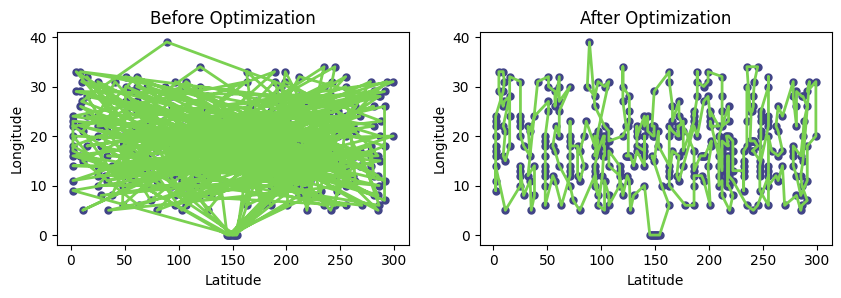



File Name: bcl380
Total cities: 380

Initial Path Cost: 25888.70933888414
Initial Path:
133 --> 345 --> 300 --> 198 --> 375 --> 293 --> 11 --> 287 --> 354 --> 3 --> 31 --> 125 --> 176 --> 103 --> 77 --> 71 --> 338 --> 373 --> 113 --> 201 --> 95 --> 228 --> 86 --> 195 --> 274 --> 234 --> 325 --> 84 --> 36 --> 157 --> 102 --> 129 --> 350 --> 337 --> 166 --> 56 --> 286 --> 6 --> 310 --> 250 --> 204 --> 357 --> 246 --> 16 --> 168 --> 362 --> 28 --> 138 --> 245 --> 190 --> 216 --> 29 --> 23 --> 27 --> 41 --> 101 --> 45 --> 93 --> 26 --> 299 --> 280 --> 136 --> 367 --> 196 --> 122 --> 186 --> 88 --> 184 --> 163 --> 54 --> 135 --> 229 --> 264 --> 208 --> 219 --> 366 --> 244 --> 378 --> 112 --> 261 --> 267 --> 317 --> 230 --> 352 --> 72 --> 44 --> 225 --> 213 --> 143 --> 336 --> 80 --> 75 --> 365 --> 368 --> 170 --> 85 --> 240 --> 158 --> 369 --> 197 --> 109 --> 60 --> 312 --> 114 --> 340 --> 380 --> 38 --> 181 --> 296 --> 343 --> 339 --> 131 --> 328 --> 358 --> 79 --> 318 --> 51 --> 265 -->

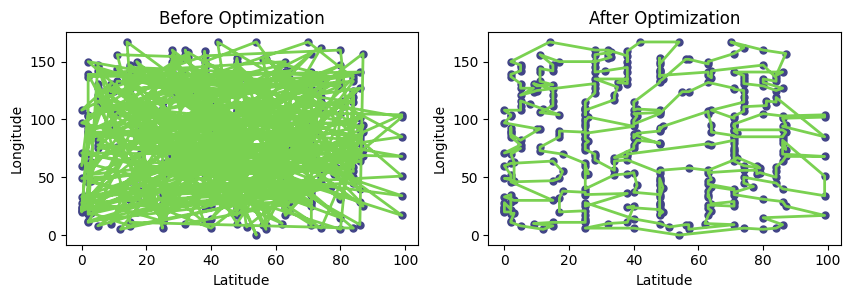



File Name: xqf131
Total cities: 131

Initial Path Cost: 4558.4345977003495
Initial Path:
28 --> 14 --> 130 --> 24 --> 112 --> 121 --> 101 --> 123 --> 41 --> 113 --> 94 --> 90 --> 58 --> 125 --> 89 --> 129 --> 124 --> 102 --> 26 --> 52 --> 109 --> 104 --> 110 --> 7 --> 40 --> 78 --> 76 --> 9 --> 81 --> 84 --> 66 --> 16 --> 117 --> 105 --> 126 --> 25 --> 15 --> 122 --> 31 --> 103 --> 17 --> 36 --> 50 --> 55 --> 93 --> 10 --> 62 --> 61 --> 127 --> 48 --> 6 --> 71 --> 3 --> 87 --> 53 --> 120 --> 108 --> 42 --> 77 --> 49 --> 97 --> 11 --> 47 --> 79 --> 128 --> 91 --> 82 --> 92 --> 18 --> 73 --> 51 --> 107 --> 83 --> 45 --> 54 --> 19 --> 39 --> 5 --> 59 --> 46 --> 21 --> 56 --> 118 --> 43 --> 34 --> 23 --> 75 --> 29 --> 2 --> 44 --> 13 --> 99 --> 106 --> 64 --> 95 --> 116 --> 74 --> 65 --> 8 --> 88 --> 57 --> 37 --> 32 --> 114 --> 86 --> 60 --> 115 --> 20 --> 111 --> 85 --> 96 --> 70 --> 1 --> 72 --> 35 --> 63 --> 30 --> 12 --> 80 --> 22 --> 119 --> 98 --> 27 --> 100 --> 69 --> 67 --> 131 

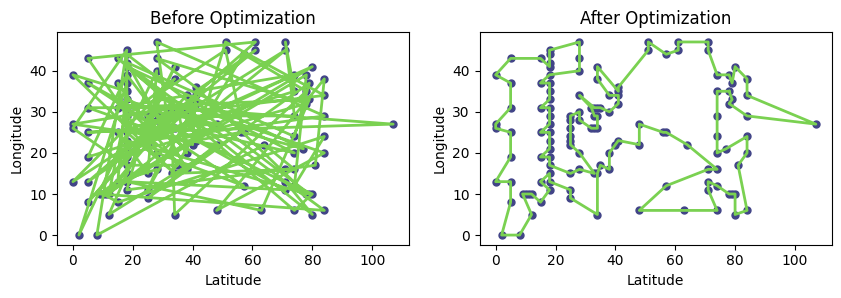

In [14]:
def run_simulation():
    data_folder = '/content/drive/MyDrive/data'

    data_files = [
        f"{data_folder}/xqg237.tsp",
        f"{data_folder}/pma343.tsp",
        f"{data_folder}/pka379.tsp",
        f"{data_folder}/bcl380.tsp",
        f"{data_folder}/xqf131.tsp"
    ]

    index = 1
    for file in data_files:
        nodes, locations = read_tsp_file(file)
        coordinates = np.array(nodes)
        num_nodes = len(coordinates)

        distance_matrix = np.zeros((num_nodes, num_nodes), dtype=float)

        for i in range(num_nodes):
          for j in range(i + 1, num_nodes):
             distance_matrix[i, j] = calculate_distance(nodes, i, j)
             distance_matrix[j, i] = distance_matrix[i, j]


        start_time = time.time_ns()
        optimal_path, optimal_cost, initial_route, initial_cost, iterations = perform_simulated_annealing(nodes, distance_matrix, num_nodes)
        end_time = time.time_ns()

        print('\nInitial Path Cost:', initial_cost)
        print('Initial Path:')
        display_route(initial_route, locations)

        print('\nOptimal Path Cost:', optimal_cost)
        print('Optimal Path:')
        display_route(optimal_path, locations)
        print('Number of Iterations in Simulated Annealing:', iterations)
        print('Simulated Annealing execution time in seconds:', (end_time - start_time) / 1e9, "seconds")

        plt.figure(figsize=(10, 16))
        plt.subplot(len(data_files), 2, index)
        plot_graph(nodes, initial_route)
        plt.title("Before Optimization")
        plt.xlabel("Latitude")
        plt.ylabel("Longitude")
        index += 1

        plt.subplot(len(data_files), 2, index)
        plot_graph(nodes, optimal_path)
        plt.title("After Optimization")
        plt.xlabel("Latitude")
        plt.ylabel("Longitude")
        index += 1

        plt.show()

run_simulation()